In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv')
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
print(df.shape)
df.info()

(8950, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  


In [3]:
print(f"Total de valores únicos :")
for column in df:
    print(f"")
    print(f"{column} : {df[column].unique().shape[0]}")
    print(f"Valores:{df[column].unique()}")

Total de valores únicos :

CUST_ID : 8950
Valores:['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']

BALANCE : 8871
Valores:[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]

BALANCE_FREQUENCY : 43
Valores:[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]

PURCHASES : 6203
Valores:[  95.4     0.    773.17 ...  291.12  144.4  1093.25]

ONEOFF_PURCHASES : 4014
Valores:[   0.    773.17 1499.   ...  734.4  1012.73 1093.25]

INSTALLMENTS_PURCHASES : 4452
Valores:[  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]

CASH_ADVANCE : 4323
Valores:[   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]

P

In [4]:
#df  = df.drop(columns = ['CUST_ID','TENURE'], axis = 1)
df.drop(columns = ['CUST_ID','TENURE'], axis = 1, inplace=True)

In [5]:
missing = df.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [6]:
# Preencher dados faltantes com mediana
df.fillna(df.median(), inplace = True)
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [7]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(df.values)
values


array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [8]:
from sklearn.cluster import KMeans

import numpy as np



seed = 42
np.random.seed(seed)

model = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)

y_pred  = model.fit_predict(values)

In [9]:
from sklearn import metrics
labels = model.labels_
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
print(silhouette)

0.3644845919974304


In [11]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.0757138590613295

In [12]:
calinski = metrics.calinski_harabasz_score(values,labels)
calinski

3431.79374284143

In [28]:
def clustering_algorithms(n_clusters, dataset):
    print(f'N clusters: {n_clusters}')
    model = KMeans(n_clusters = n_clusters, n_init = 10, max_iter = 300)
    labels  = model.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric = 'euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset,labels)
    print(f'Silhouette_score: {round(s,2)}')
    print(f'Davies_bouldin_score: {round(dbs,2)}')
    print(f'Calinski_harabasz_score: {round(calinski,2)}')
    return


In [29]:
clustering_algorithms(5, values)
print('-'*100)
clustering_algorithms(10, values)
print('-'*100)
clustering_algorithms(15, values)
print('-'*100)
clustering_algorithms(2, values)

N clusters: 5
Silhouette_score: 0.36
Davies_bouldin_score: 1.08
Calinski_harabasz_score: 3431.78
----------------------------------------------------------------------------------------------------
N clusters: 10
Silhouette_score: 0.31
Davies_bouldin_score: 1.16
Calinski_harabasz_score: 3017.63
----------------------------------------------------------------------------------------------------
N clusters: 15
Silhouette_score: 0.3
Davies_bouldin_score: 1.16
Calinski_harabasz_score: 2703.49
----------------------------------------------------------------------------------------------------
N clusters: 2
Silhouette_score: 0.3
Davies_bouldin_score: 1.52
Calinski_harabasz_score: 3321.85


In [34]:
random_data = np.random.rand(len(values),values.shape[1])
clustering_algorithms(5, random_data)

N clusters: 5
Silhouette_score: 0.04
Davies_bouldin_score: 3.54
Calinski_harabasz_score: 302.17


In [36]:
set1, set2, set3 = np.array_split(values,3)
clustering_algorithms(5, set1)
print('-'*100)
clustering_algorithms(5, set2)
print('-'*100)
clustering_algorithms(5, set3)

N clusters: 5
Silhouette_score: 0.37
Davies_bouldin_score: 1.06
Calinski_harabasz_score: 1204.05
----------------------------------------------------------------------------------------------------
N clusters: 5
Silhouette_score: 0.35
Davies_bouldin_score: 1.14
Calinski_harabasz_score: 1194.95
----------------------------------------------------------------------------------------------------
N clusters: 5
Silhouette_score: 0.37
Davies_bouldin_score: 1.1
Calinski_harabasz_score: 1167.53


<function matplotlib.pyplot.show(close=None, block=None)>

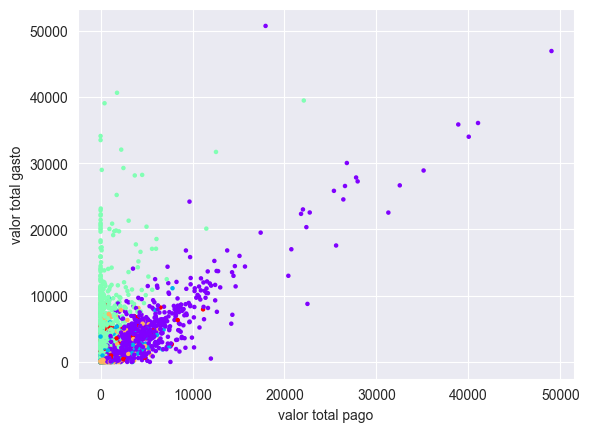

In [37]:
import matplotlib.pyplot as plt
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap='rainbow' )
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

In [39]:
import seaborn as sns

df['cluster'] = labels
sns.pairplot(df[0:],hue='cluster')


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000002E2AE753670> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x000002E2E2A35DC0> (for post_execute):



KeyboardInterrupt



In [40]:
df.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1540.0  1142.222657  1664.035755   0.000000   211.566656   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2        1072.0  1794.024195  1982.950586   0.000000   506.925348   
3        3278.0   443.992358   846.597972   0.000000    23.315538   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         554.332740  1370.859355  19043.138560            1540.0  0.928053   
1        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
2        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
3          82.992153   411.193793   9630.367575            3278.0  0.774417   
4        1337.287314  2138.678431  11670.179850             411.0  0.989486   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       524.184580  18621.013310           1540.0  0.278582   
1        ...      1330.593643   8345.641905           2649.0  0.001799   
2        ...       884.718306  21235.065300           1072.0  0.117384   
3        ...       248.800040   4483.503862           3278.0  0.246549   
4        ...      7112.618584  76406.207520            411.0  0.019318   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.367203  0.0  0.0  0.083333  0.545455  1.0  
1        0.023260  0.0  0.0  0.000000  0.000000  0.6  
2        0.186853  0.0  0.0  0.083333  0.142857  1.0  
3        0.346601  0.0  0.0  0.000000  0.444444  1.0  
4        0.090901  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [41]:
centroids = model.cluster_centers_
centroids

array([[1.59699490e-01, 2.45649360e-04, 4.38116859e-01, 2.56325660e-01,
        1.81962376e-01, 2.57889184e-02, 2.04826443e-04, 8.87914942e-05,
        1.51162866e-04, 9.36296056e-06, 1.69350945e-04, 6.17145756e-03,
        6.04336246e-01, 4.02584838e-01, 8.54128174e-02, 7.26645255e-05],
       [5.04263792e-01, 2.72194282e-04, 6.17808431e-02, 3.62269020e-02,
        2.55756543e-02, 2.52903017e-01, 6.73170559e-05, 2.56975193e-05,
        4.50651626e-05, 5.74388410e-05, 1.15687334e-03, 1.33194105e-03,
        7.19174706e-01, 1.66205262e-01, 1.79245673e-01, 5.52303554e-07],
       [2.35141479e-01, 2.16555293e-04, 6.03857074e-02, 3.44170171e-02,
        2.59739049e-02, 4.00128071e-01, 5.26401668e-05, 2.04882397e-05,
        3.51921361e-05, 6.54864556e-05, 1.57199032e-03, 1.12217156e-03,
        5.35089146e-01, 5.98040052e-01, 1.04348171e-01, 2.77498236e-05],
       [6.91386971e-02, 2.30552524e-04, 1.21267798e-01, 4.80255998e-02,
        7.33425496e-02, 2.43607736e-02, 1.72581896e-04, 3.370

In [42]:
max = len(centroids[0])
for i in range(max):
    print(df.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [45]:
description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

C:\Users\dmm\AppData\Local\Temp\ipykernel_18740\4090756182.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1142.222657,3268.886929,183.019398,4097.701397,3037.241495,1540
1,3037.962543,385.248630,1636.917210,4495.771989,968.890376,2649
2,1794.024195,475.494823,3270.246792,3976.372399,4709.556601,1072
3,443.992358,629.345171,141.569301,5132.945933,814.477150,3278
4,1987.501586,854.865815,421.129352,2227.737226,1336.238911,411


In [48]:
'''CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.'''

C:\Users\dmm\AppData\Local\Temp\ipykernel_18740\4090756182.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1142.222657,3268.886929,183.019398,4097.701397,3037.241495,1540
1,3037.962543,385.248630,1636.917210,4495.771989,968.890376,2649
2,1794.024195,475.494823,3270.246792,3976.372399,4709.556601,1072
3,443.992358,629.345171,141.569301,5132.945933,814.477150,3278
4,1987.501586,854.865815,421.129352,2227.737226,1336.238911,411


In [50]:
df.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1540.0,0.278582,0.367203,0.0,0.0,0.083333,0.545455,1.0
1,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
2,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
3,3278.0,0.246549,0.346601,0.0,0.0,0.000000,0.444444,1.0
4,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
